In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
churn = pd.read_csv('/Users/navyatrilok/Documents/DATASCIENCE/Datasets/churn.csv')

In [23]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Preprocessing

In [24]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
churn.columns = [i.lower() for i in churn.columns]

In [26]:
churn

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [27]:
churn.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [28]:
churn.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [29]:
churn['totalcharges'].astype('float64')

ValueError: could not convert string to float: ''

In [30]:
churn[churn['totalcharges']==' ']

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [31]:
churn.churn.value_counts()

churn
No     5174
Yes    1869
Name: count, dtype: int64

In [32]:
churn[churn['tenure'] > 30].churn.value_counts(normalize = True)

churn
No     0.869489
Yes    0.130511
Name: proportion, dtype: float64

In [33]:
churn[churn['tenure'] < 30].churn.value_counts(normalize = True)

churn
No     0.605212
Yes    0.394788
Name: proportion, dtype: float64

In [34]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [35]:
churn.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [36]:
churn.totalcharges = churn.monthlycharges * churn.tenure

In [20]:
churn[churn.totalcharges == ' ']

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn


In [21]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


## EDA

<AxesSubplot:xlabel='churn', ylabel='count'>

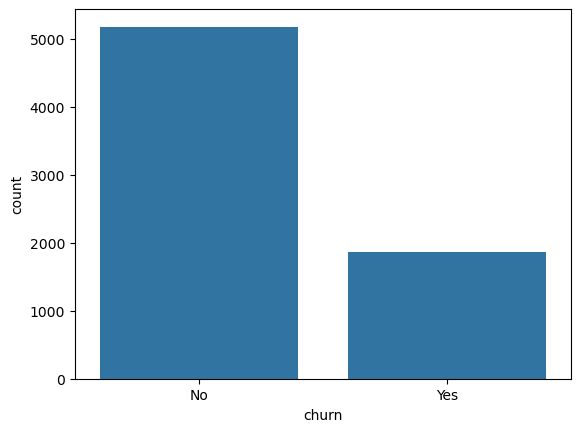

In [22]:
sns.countplot(x='churn',data=churn)

In [23]:
churn.churn.value_counts()

churn
No     5174
Yes    1869
Name: count, dtype: int64

In [24]:
churn.churn.value_counts(normalize=True)

churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [25]:
churn.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [26]:
churn[churn.tenure <= 30].totalcharges.describe()

count    3641.000000
mean      690.030321
std       712.233893
min         0.000000
25%       125.250000
50%       418.800000
75%      1069.800000
max      3313.500000
Name: totalcharges, dtype: float64

In [29]:
churn[churn.tenure <= 30].totalcharges.describe()

count    3641.000000
mean      690.030321
std       712.233893
min         0.000000
25%       125.250000
50%       418.800000
75%      1069.800000
max      3313.500000
Name: totalcharges, dtype: float64

In [30]:
churn[churn.tenure<=30].groupby('churn')['totalcharges'].describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
No,2216.0,716.415005,705.484963,0.00,169.30,457.775,1118.1125,3313.5
Yes,1425.0,648.999825,720.935692,18.85,81.95,336.200,1005.6000,3006.0


In [32]:
churn.totalcharges.describe()

count    7043.000000
mean     2279.581350
std      2264.729447
min         0.000000
25%       394.000000
50%      1393.600000
75%      3786.100000
max      8550.000000
Name: totalcharges, dtype: float64

In [33]:
churn[churn.tenure<=30].groupby('churn')['totalcharges'].describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
No,2216.0,716.415005,705.484963,0.00,169.30,457.775,1118.1125,3313.5
Yes,1425.0,648.999825,720.935692,18.85,81.95,336.200,1005.6000,3006.0


In [34]:
churn[churn.tenure<=30].groupby('churn')['monthlycharges'].describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
No,2216.0,51.056069,27.015356,18.25,20.4875,50.375,74.75,112.95
Yes,1425.0,70.086351,24.115744,18.85,50.8000,75.350,89.10,112.95


In [36]:
churn.internetservice.value_counts()

internetservice
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

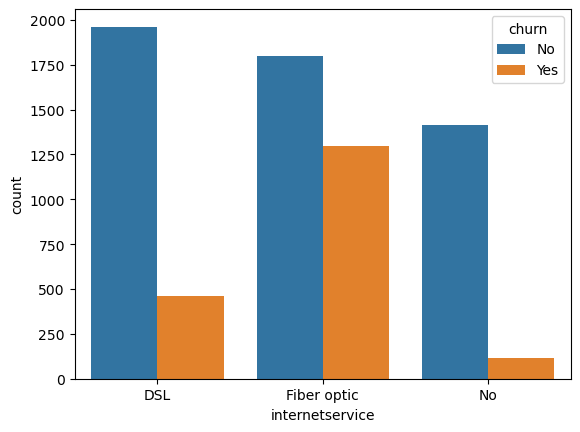

In [37]:
sns.countplot(x='internetservice',data=churn,hue='churn')
plt.show()

<AxesSubplot:xlabel='internetservice', ylabel='count'>

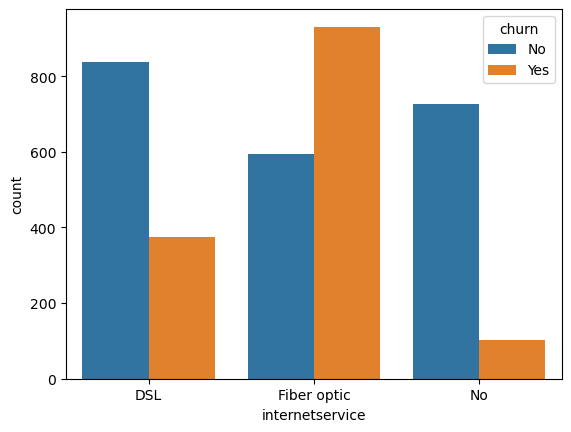

In [42]:
sns.countplot(x='internetservice',data=churn[churn['tenure']<30],hue='churn')
#clearly shows more people are leaving when using Fibre optic internetservice

/Users/navyatrilok/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 53.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/navyatrilok/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 66.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/navyatrilok/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 88.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/navyatrilok/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 62.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/navyatrilok/opt/anaconda3

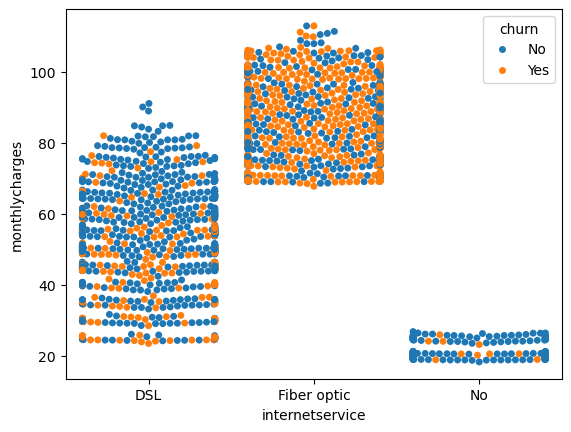

In [45]:
sns.swarmplot(x='internetservice',y='monthlycharges',data=churn[churn.tenure<30],hue='churn')
plt.show()

<AxesSubplot:xlabel='internetservice', ylabel='monthlycharges'>

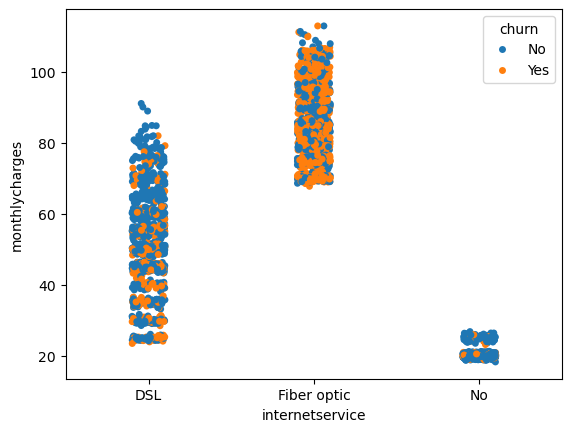

In [46]:
sns.stripplot(x='internetservice',y='monthlycharges',data=churn[churn.tenure<30],hue='churn')
#clearly see more people leaving in fibre optic(orange is more)



## Model Fitting

In [50]:
X = churn[churn.tenure < 30][['tenure','monthlycharges']]
y = churn[churn.tenure < 30]['churn']

In [51]:
X.shape,y.shape

((3569, 2), (3569,))

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=400)

In [68]:
X_train.shape,X_test.shape,

((3169, 2), (400, 2))

## Predictions

In [71]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6025

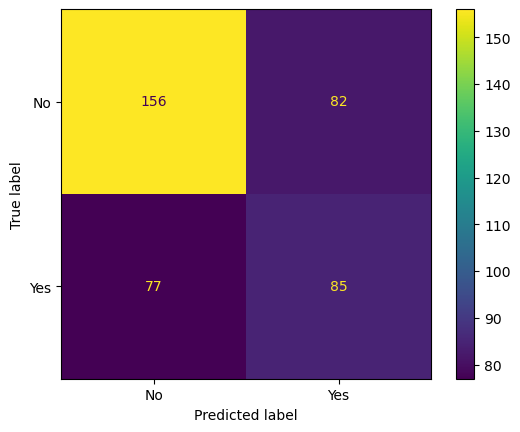

In [72]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

## Business Metrics

In [4]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
churn.customerID.nunique()

7043

In [10]:
churn.columns = [i.lower() for i in churn.columns]

## 1. Customer Churn Rate

## Churn Rate= (Total Number of Customers at the Start of Period / Number of Customers Who Churned) * 100

 

In [13]:
churn[churn['churn'] == 'Yes'].customerid.nunique()

1869

In [14]:
(1869/7043)*100

26.536987079369588

## 2. Customer Retention Rate

## Retention Rate=100−Churn Rate

In [16]:
100 - 26.5

73.5

## 3. Average Monthly Revenue Per Customer (ARPU)

ARPU = Total Number of Customers/Total Revenue


In [37]:
churn.totalcharges.sum()

16055091.45

In [39]:
16055091.45/7043

2279.5813502768706

## 4. Customer Lifetime Value (CLTV)

The predicted net profit a customer will bring to a company over their entire relationship.

CLTV = (Average Revenue per User (ARPU)×Customer Lifetime) / Churn Rate

In [41]:
(2279.58 * (1/26.5))/ 2279.58

0.03773584905660377

## 5. Churn Segmentation by Service Attributes

Customers chose tenure is less than 30 are churning more

In [45]:
churn[churn.tenure<=30].groupby('churn')['monthlycharges'].describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
No,2216.0,51.056069,27.015356,18.25,20.4875,50.375,74.75,112.95
Yes,1425.0,70.086351,24.115744,18.85,50.8000,75.350,89.10,112.95


In [46]:
churn[churn.tenure>30].groupby('churn')['monthlycharges'].describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
No,2958.0,68.913286,31.747925,18.40,39.4125,75.60,95.5000,118.75
Yes,444.0,88.418468,20.958787,19.35,79.4500,95.25,104.0125,118.35
